# PDEs 3 Workshop 1

Welcome to the first workshop of the PDE 3 (Numerical) course! 

### How the workshops will work:

These workshops will give you a chance to put into practice the materials you have learnt in the lectures. You will have a two-hour workshop every two weeks and each will be in the format of a Jupyter Notebook like this one, allowing you to write and run code as well as give written answers in the same document. If you are unsure of how to use Jupyter Notebooks, take a look at the quickstart guide [here](https://jupyter-notebook.readthedocs.io/en/latest/) or ask one of your demonstators for help.

All of the work we will complete in these workshops will use standard Python libraries such as `numpy` and `matplotlib`. Any modules that are required for an exercise will have been imported for you. You certainly should not need to try to install any modules yourself.

When you are asked to write a Python function to complete a task, there may be a test cell below it which you can use to check your work. These will give comments to help you, incase you make any common mistakes. If your code passes these checks, you have likely implemented it correctly (though you should always check to make sure yourself too!).

**Hint:** You may find it useful to turn on line numbers when you are debugging - you can do this by going to `View` > `Show Line Numbers`.


Some questions will require you to do analytic work; you can either type your answers using [LaTeX](https://www.overleaf.com/learn/latex/Mathematical_expressions) or write them by hand separately.

### In this workshop:
- Section 1: Python Referesher
- Section 2: Getting started with Numerical Methods
- Section 3: Introduction to PDEs and Plotting Refresher

In [1]:
# Run this cell to import the required modules.
# Do this before you write any code!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Python Refresher

In this section, we will refresh your Python skills and cover some basic functions which you will probably find useful throughout the course. If you need any help, please ask one of the demonstrators.


### a)
Create two variables called `test_integers` and `test_floats`, and print them. `test_integers` should be a numpy array of even numbers between 2 and 10 (inclusive). `test_floats` should be a numpy array of 10 evenly spaced numbers in the interval [0,4) - this includes 0.0 but not 4.0.

**Hint:** You may find the following functions useful:
- [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
- [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [2]:
## Your Code Here:

### BEGIN SOLUTION ###

test_integers = np.arange(2,11,2)
test_floats = np.linspace(0,4,10, endpoint=False)

print('The values of test_integers are given by:', test_integers)
print('The values of test_floats are given by:', test_floats)

### END SOLUTION ###

The values of test_integers are given by: [ 2  4  6  8 10]
The values of test_floats are given by: [0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6]


In [3]:
# This is a test cell. Run it to test the implementation of your code above.

### BEGIN TEST ###

assert type(test_integers) == np.ndarray, "The variable `test_integers` does not seem to be a numpy array. Ensure it is a numpy array and not a list (or another data type)."
assert test_integers.size == 5, "The variable `test_integers` should contain 5 elements. Print it to the screen to see how many it contains."
assert np.isclose(test_integers, np.array([2,4,6,8,10])).all(), "The elements of `test_integers` do not seem to be correct. Print it to the screen to see what they are."

assert type(test_floats) == np.ndarray, "The variable `test_floats` does not seem to be a numpy array. Ensure it is a numpy array and not a list (or another data type)."
assert test_floats.size == 10, "The variable `test_floats` should contain 10 elements. Print test_floats.size to the screen to see how many elements it contains."
assert np.isclose(test_floats, np.array([0.,0.4,0.8,1.2,1.6,2.,2.4,2.8,3.2,3.6])).all(), "The elements of `test_floats` do not seem to be correct. Print it to the screen to see what they are."
# Note: you should NOT define the numpy arrays manually as they have been done here! Use the hint in the question instead. 

### END TEST ###

### b) 

Let us now explore Python array indexing and slicing. 
- For the test_integers array, print its second element to its fourth element.
- For the test_floats array, print backwards its last element to its third element.

For our future workshops, you may find it useful to revise what is called `-1 based indexing` in Python, and to understand what is included when you slice an array `A[start:stop]`.  

In [4]:
## Your Code Here:

print(test_integers[1:4])
print(test_floats[:1:-1])

[4 6 8]
[3.6 3.2 2.8 2.4 2.  1.6 1.2 0.8]


### c)
Define a function `f` equavalent to $f(x) = \sin(2 x) + \cos(2 x)$. It should take either floats or numpy arrays as input. Test the created function by entering the previously created `test_integers` as input and printing the output. You may find the `def` keyword useful in python to define your function.

In [5]:
## Your Code Here:

### BEGIN SOLUTION ###
def f(x):
    """
    A function which takes a float or a numpy array as input and returns f(x) = sin(2x) + cos(2x) as output (as either a float or a numpy array).
    """
    return np.sin(2. * x) + np.cos(2. * x)

print('The results for f(x) are given by:', f(test_floats))
### END SOLUTION ###

The results for f(x) are given by: [ 1.          1.4140628   0.97037408 -0.06193053 -1.05666892 -1.41044612
 -0.90866563  0.14429924  1.10973412  1.40201918]


In [6]:
### BEGIN TEST ###

assert type(f(0.)) == np.float64, "Check that your function returns a float when a float is passed to it."
assert type(f(test_floats)) == np.ndarray, "Check that your function returns a numpy array when a numpy array is passed to it. This is the default behaviour for numpy functions. \nYou should not be using lists!"
assert np.isclose(f(0.5), 1.38177329) and np.isclose(f(0), 1.) and np.isclose(f(np.pi/4), 1.), "Check that the function you have implemented is sin(2x)"
assert np.isclose(f(test_floats), np.array([1.,1.4140628,0.97037408,-0.06193053,-1.05666892,-1.41044612,-0.90866563,0.14429924,1.10973412,1.40201918])).all(), "Check that your function works with both numpy arrays as well as floats."

### END TEST ###

## Section 2: Numerical Derivatives
### a)
Complete the function `forwards_derivative` defined below which **numerically** calculates the forwards derivative of a function `f` passed into it at a point `x` with a stepsize `delta_x`.

**Hint:** The forwards derivative is defined as:
$$
\frac{df}{dx} \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$

In [7]:

def forwards_derivative(f, x: float | np.ndarray, delta_x: float = 1e-6)-> float | np.ndarray:
    """A function to numerically calculate the forwards derivative of an input function at a given point.
    
    Parameters
    ----------
    f : 
        The function for which the derivative is to be calculated.
    x : 
        The point at which the derivative is to be calculated. This should be a float or a numpy array of floats.
    delta_x : 
        The step size for the numerical derivative calculation. Default is 1e-6.

    Returns
    -------

        The numerical derivative of the function at the point x. This will be a float or a numpy array of floats depending on the input x.
    
    """

    ## Your Code Here:

    ### BEGIN SOLUTION ###

    numerator = f(x+delta_x)-f(x)
    denominator = delta_x
    return numerator / denominator

    ### END SOLUTION ###


In [8]:
### BEGIN TEST ###

def test_fct(x: float | np.ndarray)-> float | np.ndarray:
    return x
assert np.isclose(1, forwards_derivative(f=test_fct, x=2, delta_x=1e-6)), "Check to ensure you have implemented the forwards derivative correctly. Check to ensure it works for any general function of x."
assert np.isclose(np.ones(5), forwards_derivative(f=test_fct, x=np.arange(1,6), delta_x=1e-6)).all(), "Your forwards derivative seems to work with single numbers but not numpy arrays. Check your implementation to ensure it works with both."
assert np.isclose(2.*np.cos(2.*test_floats)-2.*np.sin(2.*test_floats), forwards_derivative(f=f, x=test_floats, delta_x=1e-7)).all(), "Your forwards derivative seems to work with simple functions but not more complicated ones. Check to ensure it works for any general function of x."

### END TEST ###

### b)
Plot the difference between the numeric derivative of `f` (calculated using `forwards_derivative`) and the analytic derivative for three values of `delta_x` (one too small, one 'just right' and one too large) in the range $-\pi \le x \le \pi$. You will need to play around to find sensible values of `delta_x`. The analytic derivative is defined for you below.

In [9]:
# This cell will give you the analytic derivative of f(x) = sin(pi*x).
# You don't need to do anything here, just run the cell.

### BEGIN READ ONLY ###

def analytic_derivative(x: float | np.ndarray)-> float | np.ndarray:
    """The analytic derivative of sin(pi*x). Takes a value (or values) of x as input."""
    return 2 * np.cos(2*x) - 2 * np.sin(2*x)

### END READ ONLY ###

Hint: You might find the [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function useful when plotting.

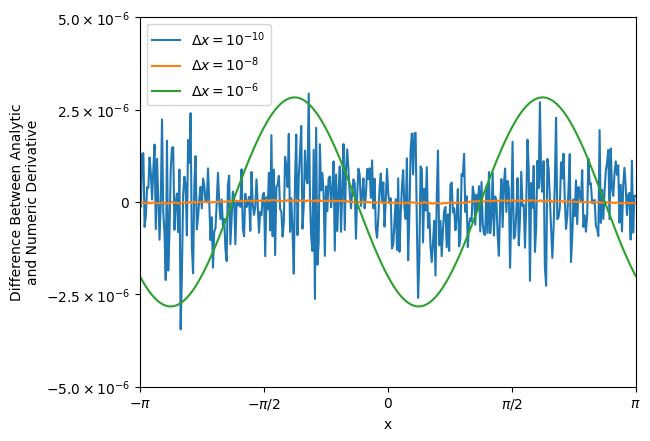

In [10]:
## Your Code Here:

### BEGIN SOLUTION ###

delta_xs = [1e-10, 1e-8, 1e-6]
labels = [r'$\Delta x = 10^{-10}$', r'$\Delta x = 10^{-8}$', r'$\Delta x = 10^{-6}$']
xs = np.linspace(-np.pi,np.pi,400)

for delta_x, label in zip(delta_xs, labels):
    diff = forwards_derivative(f=f, x=xs, delta_x=delta_x) - analytic_derivative(x=xs)
    plt.plot(xs, diff, label = label)

plt.xlabel("x")
plt.ylabel(f"Difference Between Analytic\nand Numeric Derivative")
plt.legend()
plt.xlim((-np.pi,np.pi))
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi], [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
plt.yticks([-5e-6,-2.5e-6,0,2.5e-6,5e-6], [r"$-5.0\times 10^{-6}$", r"$-2.5\times 10^{-6}$", r"$0$", r"$2.5\times 10^{-6}$", r"$5.0\times 10^{-6}$"])
plt.show()

### END SOLUTION ###

### c)
Explain why each curve on the plot has the shape that it does.

<font color= 'orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:

The curve for $\Delta x = 10^{-6}$ is proportional to $-4\sin{(2x)}-4\cos{(2x)}$. This is the second derivative of the function and is the next term in the Taylor Series. In this case, $\Delta x$ is too large, so the error is dominated by the second derivative term.
In the case for $\Delta x = 10^{-10}$, $\Delta x$ is too small, so the error is dominated by the floating point error in the calculation of the derivative. This means that the difference between steps is too small to be stored to the standard (16 bit) precision of the ``floats`` used by the computer.
$\Delta x$ is 'just right' when $\Delta x = 10^{-8}$, as the difference between the analytic and numeric derivatives is almost zero.

</font>

## Section 3: Introduction to PDEs

In this section, we will look at the properties of PDEs.

### a)
Show (by hand) that the following PDE is a parabolic PDE when $\beta = 0$:

$$
\alpha^2 \dfrac{\partial^2 u}{\partial x^2} = \beta\dfrac{\partial ^2 u}{\partial t^2} + \gamma\dfrac{\partial u}{\partial t}
$$

<font color='orange'>Your answer goes here. Double-click the cell to modify it.

Here is an example of how to write mathematical equations using $\LaTeX$ syntax:

$$
x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}
$$
</font>

<font color='red'>

### Solution:

We have $\beta = 0$, so:

$$
\alpha^2 \dfrac{\partial^2 u}{\partial x^2} = \gamma\dfrac{\partial u}{\partial t}
$$


In the form
$$
A\frac{\partial^2 u}{\partial x^2} + 2B \frac{\partial^2 u}{\partial x \partial t} + C\frac{\partial^2 u}{\partial t^2}  + ... = 0
$$
We have $A = \alpha^2$, $B = 0$, $C = 0$

so $B^2 - AC = 0$ which is the condition for a parabolic PDE.

</font>

### b)
Bonus question: State the values for $\alpha$, $\beta$ and $\gamma$ which would make the PDE in (a) an elliptic PDE and a hyperbolic PDE.

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:
We have no cross term so always have $B=0$.
Assuming that $\alpha$ is real, $\alpha^2 > 0$ for all $\alpha$.

So the the type is determined by $c=-\beta$:

* $\beta < 0$ Hyperbolic
* $\beta = 0$ Parabolic
* $\beta > 0$ Elliptic

$\gamma$ has no effect as it is the coefficient of a firsat order derivative.

</font>


### c)
Show (by hand) that 
$$
u(x,t) = e^{-kt} \cos(mx)
$$

 is a solution to the PDE in part (a) if $\alpha^2 = \frac{k}{m^2}$ when $\beta = 0$ and $\gamma = 1$

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>


<font color='red'>

### Solution:

Using $\beta = 0$ and $\gamma = 1$, we have

$$
\alpha^2 \dfrac{\partial^2 u}{\partial x^2} = \dfrac{\partial u}{\partial t}
$$
(which is a form of the Heat Equation)

then, taking derivatives gives

$$
\dfrac{\partial^2 u}{\partial x^2} = -m^2 e^{-kt} \cos(mx)
$$

and 

$$
\dfrac{\partial u}{\partial t} = -k e^{-kt} \cos(mx)
$$

so collecting together and cancelling terms gives

$$
-\alpha^2 m^2 = -k
$$

and hence, $u(x,t)$ is a solution when $\alpha^2 = \frac{k}{m^2}$.

</font>

### d)
Set $k=1$ and $m=\frac{1}{2}$ for $u(x,t)$. We will look at $u(x,t)$ in the region given by $0 \le x \le \pi$ and $0 \le t \le  1$.

Determine the boundary conditions that are suitable for the solution given above.

[Hint: Determine the value of $u(x,t)$ at the boundaries of the region]

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>


<font color='red'>

### Solution:

Setting $k=1$ and $m=\frac{1}{2}$ gives

$$
u(x,t) = e^{-t} \cos\left(\frac{x}{2}\right)
$$

So taking each side of the rectangular domain:

* $u(0,t) = e^{-t} \cos(0) = e^{-t}$
* $u(\pi,t) = e^{-t} \cos\left(\frac{\pi}{2}\right) = 0$
* $u(x,0) = e^0 \cos\left(\frac{x}{2}\right) = \cos\left(\frac{x}{2}\right)$
* $u(x,1) = e^{-1} \cos\left(\frac{x}{2}\right)$

</font>

### e)

Plot $u(x,t)$ in the region given by $ 0\le x\le\pi$ and $0\le t\le 1$.

Set $k=1$ and $m=\frac{1}{2}$ for $u(x,t)$.

You should include a colour plot with a contour plot overlayed onto it, as well as a colorbar to illustrate the value of the color in the contour plot.

**Hint:** You may find the following functions useful:
- [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) for creating the grid of points to plot.
- [`plt.subplots`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) for creating subplots in a figure.
- [`plt.pcolor`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html) for plotting the colour plot.
- [`plt.contour`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) for plotting the contours.
- [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) for creating a colorbar.

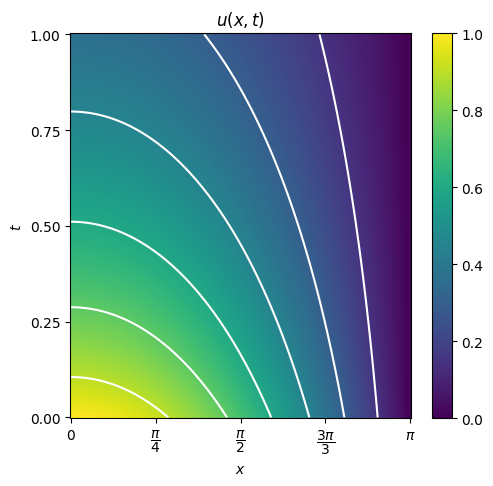

In [11]:
# Your Code Here:

### BEGIN SOLUTION ###

def U(x: float | np.ndarray, t: float | np.ndarray, k: float = 1, m: float = 0.5)-> float | np.ndarray:
    """U(x,t) = exp(-k t) cos(m x) as defined above."""
    return np.exp(-k*t)*np.cos(m*x)

# Set up the grid and calculate u(x,t).
npoints= 200
xs = np.linspace(0,np.pi,npoints)
ts = np.linspace(0,1,npoints)
X, T = np.meshgrid(xs, ts)

Z = U(X,T)

# Do the plotting.
# Here, we use subplots, though this is not necessary. Look at the Python refresher for plotting if you are unsure what is going on here.
fig, ax = plt.subplots(figsize = (5.5,5))
c = ax.pcolor(X, T, Z, cmap='viridis')
cbar = fig.colorbar(c, ax=ax)
ax.contour(X, T, Z, colors='w')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_title(r'$u(x,t)$')
ax.set_yticks(np.linspace(0,1, 5, endpoint=True))
ax.set_xticks(np.linspace(0,np.pi, 5, endpoint=True))
ax.set_xticklabels(["0",r"$\dfrac{\pi}{4}$",r"$\dfrac{\pi}{2}$", r"$\dfrac{3\pi}{3}$", r"$\pi$"])
plt.show()

### END SOLUTION ###